In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = [file for file in os.listdir('/home/akshat/Downloads/Sales data')]

for file in files:
    print(file)

data = pd.DataFrame()

Sales_October_2019.csv
Sales_January_2019.csv
Sales_December_2019.csv
Sales_November_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_February_2019.csv
Sales_April_2019.csv
Sales_June_2019.csv
Sales_July_2019.csv
Sales_May_2019.csv
Sales_September_2019.csv


In [3]:
for file in files:
    temp_data = pd.read_csv('/home/akshat/Downloads/Sales data/'+file)
    data = pd.concat([data,temp_data])


data.to_csv('all_data.csv')



In [4]:
data = pd.read_csv('all_data.csv')
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [5]:
pd.isnull(data).sum()
data.dropna(inplace=True)
pd.isnull(data).sum()


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [6]:
data = data[data['Order Date'].str[0:2] != 'Or']
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Add month column


In [7]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])


data['Sales'] = data['Quantity Ordered']*data['Price Each']

In [8]:


data['Months'] = data['Order Date'].str[0:2]

data['Months'] = data['Months'].astype('int32')



# for month in data['Months']:
#     if month in months:
        
#         # data['Months'] = months[data['Months']]

data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",379.99,10
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",389.99,10
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98,10
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99,10
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",11.99,10


 ### **What was the best month for sales? How much was earned that month?**

<Axes: xlabel='Months', ylabel='Sales in $USD'>

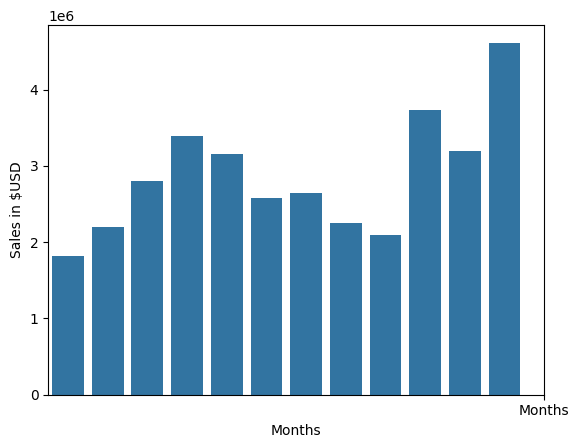

In [9]:
sales_month = data.groupby('Months').sum().sort_values(by='Sales',ascending=False)

axis = sns.barplot(x='Months',y='Sales',data=sales_month)

plt.xticks('Months')
plt.ylabel("Sales in $USD")
axis

### **December Months is the best year for sales it has sales around 25k**



### **What city sold the most product?**

In [10]:
data.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",379.99,10
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",389.99,10
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98,10
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99,10
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",11.99,10
5,5,259363,AAA Batteries (4-pack),1,2.99,10/01/19 18:55,"976 Lake St, New York City, NY 10001",2.99,10
6,6,259364,Wired Headphones,1,11.99,10/29/19 11:02,"874 North St, Los Angeles, CA 90001",11.99,10
7,7,259365,Lightning Charging Cable,1,14.95,10/29/19 11:19,"127 12th St, Los Angeles, CA 90001",14.95,10
8,8,259366,Apple Airpods Headphones,1,150.00,10/20/19 11:52,"955 9th St, Los Angeles, CA 90001",150.00,10
9,9,259367,Apple Airpods Headphones,1,150.00,10/16/19 16:19,"742 14th St, San Francisco, CA 94016",150.00,10


In [11]:
data['Purchase Address'].dtype

dtype('O')

In [12]:
data['Purchase Address'][0].split(',')

['609 Cherry St', ' Dallas', ' TX 75001']

In [13]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",379.99,10
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",389.99,10
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98,10
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99,10
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",11.99,10


In [14]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]



data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1].strip() + ' '+ get_state(x))

In [15]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",379.99,10,Dallas TX
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",389.99,10,Los Angeles CA
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98,10,New York City NY
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99,10,New York City NY
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",11.99,10,Los Angeles CA


In [16]:
sales_city = data.groupby('City',as_index=False)


In [17]:
sales_city.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",379.99,10,Dallas TX
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",389.99,10,Los Angeles CA
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98,10,New York City NY
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99,10,New York City NY
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",11.99,10,Los Angeles CA
5,5,259363,AAA Batteries (4-pack),1,2.99,10/01/19 18:55,"976 Lake St, New York City, NY 10001",2.99,10,New York City NY
6,6,259364,Wired Headphones,1,11.99,10/29/19 11:02,"874 North St, Los Angeles, CA 90001",11.99,10,Los Angeles CA
7,7,259365,Lightning Charging Cable,1,14.95,10/29/19 11:19,"127 12th St, Los Angeles, CA 90001",14.95,10,Los Angeles CA
8,8,259366,Apple Airpods Headphones,1,150.00,10/20/19 11:52,"955 9th St, Los Angeles, CA 90001",150.00,10,Los Angeles CA
9,9,259367,Apple Airpods Headphones,1,150.00,10/16/19 16:19,"742 14th St, San Francisco, CA 94016",150.00,10,San Francisco CA


In [18]:
profit_city = sales_city['Sales'].sum().sort_values(by='Sales',ascending=False)
profit_city

,City,Sales
8,San Francisco CA,8262203.91
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
2,Boston MA,3661642.01
0,Atlanta GA,2795498.58
3,Dallas TX,2767975.40
9,Seattle WA,2747755.48
7,Portland OR,1870732.34
1,Austin TX,1819581.75
6,Portland ME,449758.27


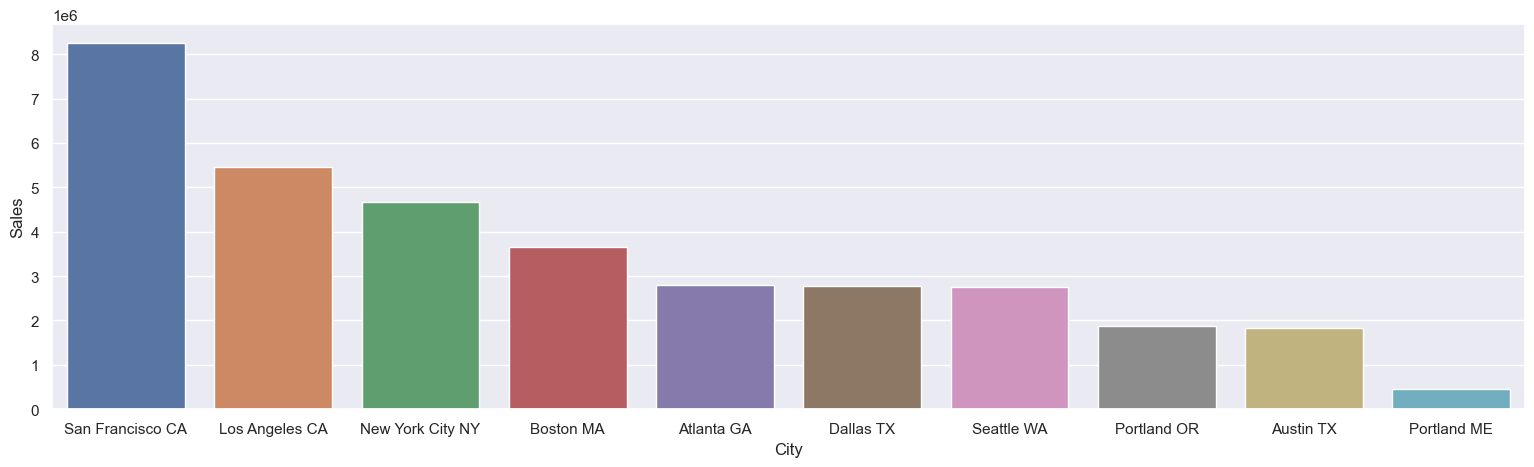

In [19]:
sns.set(rc={'figure.figsize':(19,5)})
axis = sns.barplot(x='City',y='Sales',data=profit_city,hue='City')

### **From above graph it can be concluded that san francisco CA has the hightest number of buyers**

### **What time should we display advertisements to maximize the likelihood of customer’s buying product?**

In [20]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",379.99,10,Dallas TX
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",389.99,10,Los Angeles CA
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98,10,New York City NY
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99,10,New York City NY
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",11.99,10,Los Angeles CA


In [21]:
data.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City
0,0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",379.99,10,Dallas TX
1,1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",389.99,10,Los Angeles CA
2,2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",5.98,10,New York City NY
3,3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",149.99,10,New York City NY
4,4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",11.99,10,Los Angeles CA
5,5,259363,AAA Batteries (4-pack),1,2.99,10/01/19 18:55,"976 Lake St, New York City, NY 10001",2.99,10,New York City NY
6,6,259364,Wired Headphones,1,11.99,10/29/19 11:02,"874 North St, Los Angeles, CA 90001",11.99,10,Los Angeles CA
7,7,259365,Lightning Charging Cable,1,14.95,10/29/19 11:19,"127 12th St, Los Angeles, CA 90001",14.95,10,Los Angeles CA
8,8,259366,Apple Airpods Headphones,1,150.00,10/20/19 11:52,"955 9th St, Los Angeles, CA 90001",150.00,10,Los Angeles CA
9,9,259367,Apple Airpods Headphones,1,150.00,10/16/19 16:19,"742 14th St, San Francisco, CA 94016",150.00,10,San Francisco CA


In [22]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Time'] = data['Order Date'].dt.hour
data.head()

/tmp/ipykernel_2045/313111053.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City,Order Time
0,0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",379.99,10,Dallas TX,10
1,1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",389.99,10,Los Angeles CA,17
2,2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",5.98,10,New York City NY,17
3,3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",149.99,10,New York City NY,22
4,4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",11.99,10,Los Angeles CA,16


In [23]:
sales_orderTime = data.groupby('Order Time',as_index=False)
sales_orderTime['Sales'].sum()

,Order Time,Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


<Axes: xlabel='Order Time', ylabel='Sales'>

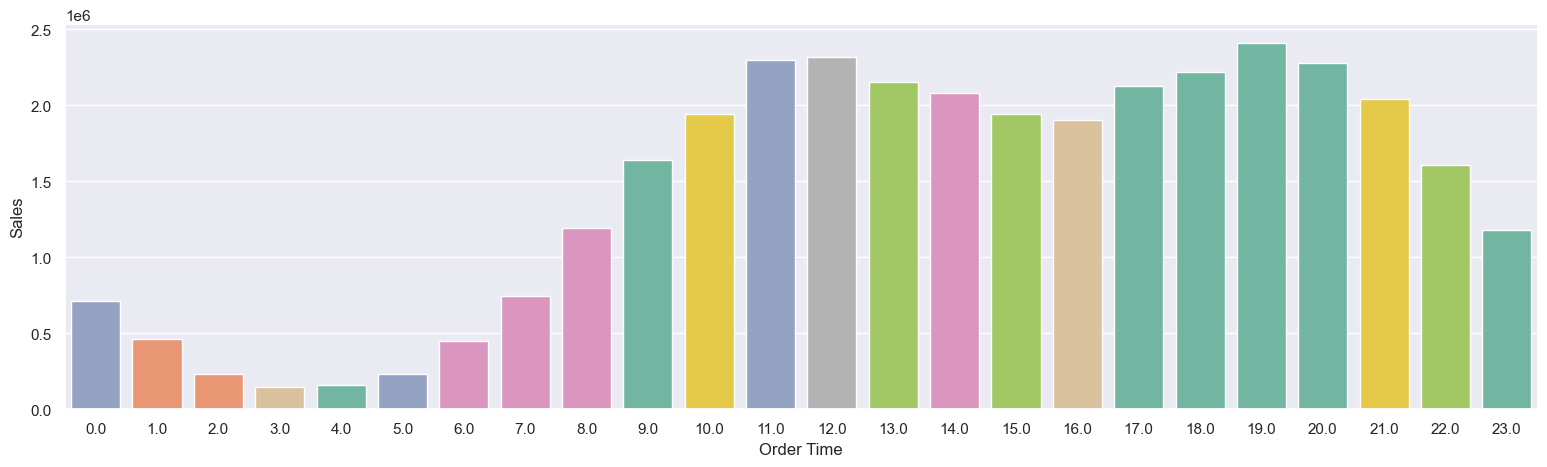

In [24]:
sales_OrderDateTime = sales_orderTime['Sales'].sum()

ax = sns.barplot(x='Order Time',y='Sales',data=sales_OrderDateTime,hue=data['Order Time'],palette='Set2',legend=False)
ax

### **BY above graph we conclude that the customers order maximum at afternoon during 10 am to 12 am and then at evening between 6pm to 8pm. Overall at 7pm, orders are maximum, so to advertise the best time is at or before 10am**

### **What products are most often sold together?**

In [25]:
product_data = data[data['Order ID'].duplicated(keep=False)]
product_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Months,City,Order Time
62,62,259420,Google Phone,1,600.00,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",600.00,10,Los Angeles CA,8
63,63,259420,USB-C Charging Cable,2,11.95,2019-10-18 08:54:00,"791 Forest St, Los Angeles, CA 90001",23.90,10,Los Angeles CA,8
65,65,259422,Google Phone,1,600.00,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",600.00,10,San Francisco CA,4
66,66,259422,USB-C Charging Cable,1,11.95,2019-10-05 04:53:00,"849 Ridge St, San Francisco, CA 94016",11.95,10,San Francisco CA,4
82,82,259438,iPhone,1,700.00,2019-10-29 09:47:00,"176 5th St, Los Angeles, CA 90001",700.00,10,Los Angeles CA,9


In [26]:
product_data['Grouped Data'] = product_data.groupby('Order ID',as_index=False)['Product'].transform(lambda x:','.join(x))
product_data.head()

#product_data = product_data[['Order ID','Grouped Data']]
product_data = product_data[['Order ID','Grouped Data']].drop_duplicates()
product_data.head()


/tmp/ipykernel_2045/117849168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Grouped Data'] = product_data.groupby('Order ID',as_index=False)['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped Data
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"


In [27]:
sales_GroupedData = product_data.groupby('Grouped Data',as_index=False)
sales_GroupedData.head()

,Order ID,Grouped Data
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"
...,...,...
184082,256708,"20in Monitor,27in FHD Monitor"
184467,257079,"iPhone,Macbook Pro Laptop"
184616,257224,"34in Ultrawide Monitor,Flatscreen TV"
186689,259208,"27in FHD Monitor,ThinkPad Laptop"


In [28]:
from collections import Counter
from itertools import combinations

count = Counter()
for group_data in product_data['Grouped Data']:
    
    row_list = group_data.split(',')
    
    
    count.update(Counter(combinations(row_list,2)))
    



# sales_GroupedData = pd.DataFrame(data=count,index=1)
# sales_GroupedData.head()

In [29]:
product_sold = data.groupby('Product',as_index=False)['Quantity Ordered'].sum()
product_sold.head()


,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


In [30]:
product_price = data.groupby('Product')['Price Each'].mean()
product_price.head()




Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

In [31]:
# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()

# ax1.bar(data['Product'],data['Quantity Ordered'])
# ax2.plot(data['Price Each'],'b-')
# ax1.set_xlabel('Product Name')
# ax1.set_ylabel('Product Quantity')
# ax2.set_ylabel('Price ($)')

# plt.show()


## **Conclusion**

### **The most sold product is AA Batteries (4-pack) because of its lower price**
